In [4]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# To suppress all warnings, use
# warnings.filterwarnings('ignore')

print('done')

done


In [5]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

print('done')

done


In [6]:
import time      # to track time for hyperparamater tuning
import datetime

print('done')

done


In [7]:
data = pd.read_csv("ITC.csv")
data.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.0,694.0,708.5,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.5,714.0,729.0,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

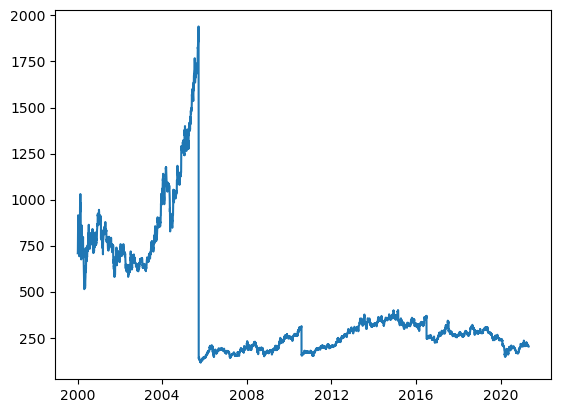

In [9]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(0,1))

data['Date'] = pd.to_datetime(data.Date, format="%Y-%m-%d")
data.index = data['Date']

plt.plot(data['Close'], label="Close price")

In [10]:
new_dat = pd.DataFrame(index=range(0, len(data)), columns=['Date', 'Close'])
for i in range(0, len(data)):
  new_dat['Date'][i] = data['Date'][i]
  new_dat['Close'][i] = data['Close'][i]
  
new_dat.index = new_dat.Date
new_dat.drop('Date', axis=1, inplace=True)

print('done')

done


In [11]:
# Feature scaling
scale = MinMaxScaler(feature_range=(0, 1))

# Prepare input data
X = []
Y = []
window_size = 50
for i in range(0, len(data) - window_size - 1, 1):
    first = data.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((data.iloc[i + j, 8] - first) / first)
    temp2.append((data.iloc[i + window_size, 8] - first) / first)
    X.append(np.array(temp).reshape(50, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, train_label, test_label = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_label = np.array(train_label)
test_label = np.array(test_label)

# Adjust shapes for LSTM
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

print('done')

done


In [12]:
# Start the timer
start_time = time.time()

# Get the current date and time
now = datetime.datetime.now()
print("Current date and time:")
print(now.strftime("%Y-%m-%d %H:%M:%S"))

print('done')

Current date and time:
2024-12-08 12:50:51
done


In [13]:
# Build Stacked LSTM model
from keras.layers import LSTM, Dense, Dropout

model = keras.Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.25))
model.add(LSTM(200, return_sequences=True))  # Stacked LSTM layer
model.add(Dropout(0.25))
model.add(LSTM(200, return_sequences=False))  # Final LSTM layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='RMSprop', loss='mse')
model.fit(train_X, train_label, validation_data=(test_X, test_label), epochs=40, batch_size=64, shuffle=False)

print('done')

Epoch 1/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - loss: 0.0095 - val_loss: 0.0030
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0040 - val_loss: 0.0025
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 12/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/ste

In [14]:
# Stop the timer
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = (end_time - start_time) /60
print(f"Total time for hyperparameter tuning: {elapsed_time:.2f} minutes")

Total time for hyperparameter tuning: 5.95 minutes


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


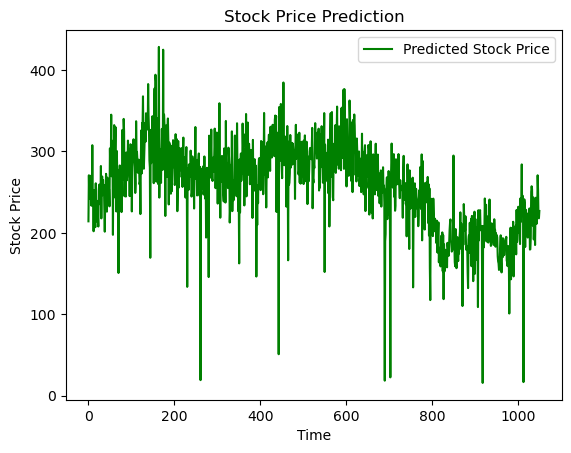

In [15]:
# Predict and visualize results
predicted = model.predict(test_X)
predicted = np.array(predicted[:, 0]).reshape(-1, 1)

len_t = len(train_X)
for j in range(len_t, len_t + len(test_X)):
    temp = data.iloc[j, 8]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

plt.plot(predicted, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [16]:
print("Shape of test_label:", test_label.shape)
print("Shape of predicted:", predicted.shape)

Shape of test_label: (1051, 1, 1)
Shape of predicted: (1051, 1)


In [17]:
test_label = test_label.reshape(-1)


In [18]:
# Calculate Mean Absolute Error and Mean Squared Error
mse = mean_squared_error(test_label, predicted)
mae = mean_absolute_error(test_label, predicted)

# Print Evaluations
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 4.685022011912624
Mean Squared Error: 44.915101133343875
